10226
Height: 4, Aspect: 1.33


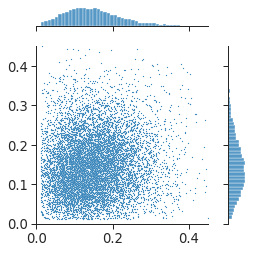

In [24]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'pf_dual_synapse_area_correlation_210829'
# from lib_weight_correlation import hist_to_mpd

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData

from weight_database import WeightDatabase
weightdb = WeightDatabase()

def weight_fn(syn):
    props = syn['props']['area_erode0']
    if 'mesh_area' in props:
        area = props['mesh_area']
    else:
        area = 0
    if area < .01125:
        area = 0
    return area
    diameter = math.sqrt(area/math.pi)*2
    return diameter*1000

gzdb = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/pfs/' \
       'gen_210429_setup01_syndb_threshold_10_coalesced.gz'

weightdb.load_syn_db(gzdb,
    weight_fn=weight_fn)

pf_mpd = MyPlotData()
pf_hist = defaultdict(int)
weights_db = weightdb.get_weights()

n_pairs = 0
syn_weights = []
random.seed(0)
array_w0 = []
array_w1 = []
# mpd_data = MyPlotData()
# hist = defaultdict(int)

# for neuron, pc_weights in weights_db.items():
#     for pc, weights in pc_weights.items():
#         if len(weights) < 2:
#             continue
#         random.shuffle(weights)
#         w0 = weights[0]
#         w1 = weights[1]
#         array_w0.append(w0)
#         array_w1.append(w1)
#         pf_mpd.add_data_point(
#             w0=w0,
#             w1=w1,
#             which='pf',
#         )

for neuron, pc_weights in weights_db.items():
    for pc, weights in pc_weights.items():
        if len(weights) < 2:
            continue
        random.shuffle(weights)
        w0 = weights[0]
        w1 = weights[1]
        array_w0.append(w0)
        array_w1.append(w1)
        pf_mpd.add_data_point(
            w0=w0,+
            w1=w1,
            which='pf',
        )
        pf_mpd.add_data_point(
            w0=w1,
            w1=w0,
            which='pf',
        )

print(len(pf_mpd.data))

importlib.reload(my_plot); my_plot.my_jointplot(
    pf_mpd,
    x="w0",
    y="w1",
    s=1.5,
    xlim=(0, .45),
    ylim=(0, .45),
    kind='scatter',
    save_filename=f'{script_n}.svg',
    context='paper',
    height=4,
    show=True,
    )


Height: 4, Aspect: 1.33


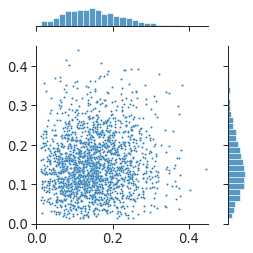

In [27]:
mpd_raw_lite = copy.copy(pf_mpd)
random.shuffle(mpd_raw_lite.data)
mpd_raw_lite.data = mpd_raw_lite.data[:2000]
importlib.reload(my_plot); my_plot.my_jointplot(
    mpd_raw_lite,
    x="w0",
    y="w1",
    s=4,
    xlim=(0, .45),
    ylim=(0, .45),
    kind='scatter',
    save_filename=f'{script_n}_lite.svg',
    context='paper',
    height=4,
    show=True,
    )

Height: 3, Aspect: 1.0


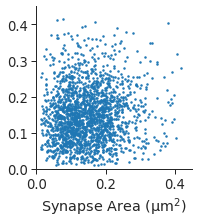

In [30]:
mpd_raw_lite = copy.copy(pf_mpd)
random.shuffle(mpd_raw_lite.data)
mpd_raw_lite.data = mpd_raw_lite.data[:2000]
importlib.reload(my_plot); my_plot.my_relplot(
    mpd_raw_lite,
    x="w0",
    y="w1",
    edgecolor=None,
    s=1,
    xlim=(0, .45),
    ylim=(0, .45),
    kind='scatter',
    save_filename=f'{script_n}_lite.svg',
    x_axis_label='Synapse Area (µm$^2$)',
    context='paper',
    height=3,
    width=3,
    show=True,
    )

In [23]:
import scipy.stats
print(scipy.stats.spearmanr(array_w0, array_w1))
print(f'n = {len(array_w1)} pairs')

SpearmanrResult(correlation=0.10003309048164552, pvalue=7.54762430522263e-13)
n = 5113 pairs


3530
Height: 6, Aspect: 1.33


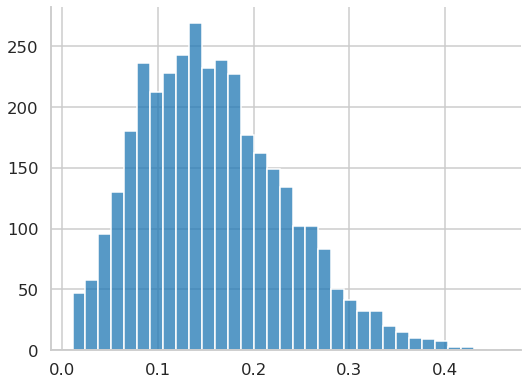

In [21]:

grc_pc_db_f = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/grc_axons/' \
              'gen_210429_setup01_syndb_threshold_10_coalesced.gz'

local_weightdb = WeightDatabase()
local_weightdb.load_syn_db(grc_pc_db_f,
    weight_fn=weight_fn)

local_mpd = MyPlotData()
hist_local = defaultdict(int)
local_weights_db = local_weightdb.get_weights()

n_pairs = 0
local_syn_weights = []
# avg_data = []
# mpd_data = MyPlotData()
for neuron, pc_weights in local_weights_db.items():
    # print(n)
    for pc, weights in pc_weights.items():
#         if len(weights) != 1:
#             continue
        avg = weights[0]
        local_syn_weights.append(avg)
        local_mpd.add_data_point(
            w=avg,
            x='Data',
        )
        hist_local[avg] += 1
        avg_data.append(avg)


print(len(local_syn_weights))

importlib.reload(my_plot); my_plot.my_displot(
    local_mpd,
    x="w",
#     y='count_cdf',
#     hue='model',
#     ci='sd',
#     save_filename=f'{script_n}_kde.svg',
    show=True,
    )


Height: 3, Aspect: 1.6666666666666667


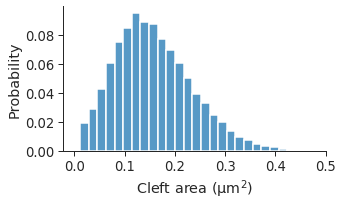

n = 23365


In [52]:
mpd_all = MyPlotData()
mpd_all.append(local_mpd)
mpd_all.append(pf_mpd)

importlib.reload(my_plot); my_plot.my_displot(
    mpd_all,
    x="w",
    stat='probability',
    bins=40,
    
#     kde=True,
#     stat='frequency',
#     y='count_cdf',
#     hue='model',
#     ci='sd',
    context='paper',
    height=3,
    width=5,
    xlim=(None, .5),
    y_axis_label='Probability',
    x_axis_label='Cleft area (µm$^2$)',
    show=True,
    save_filename=f'{script_n}.svg',
    )

print(f'n = {len(mpd_all.data)}')